Problems are labeled Easy (E), Medium (M), and Hard (H).

In [1]:
import numpy as np
import pandas as pd
import pymc3 as pm
import arviz as az
import matplotlib.pyplot as plt
from scipy import stats

4E1. In the model definition below, which line is the likelihood? 

yi ∼ Normal(μ, σ)

μ ∼ Normal(0, 10) 

σ ∼ Exponential(1)

Ans: $ y_i \text{~} Normal(\mu,\sigma)$

4E2. In the model definition just above, how many parameters are in the posterior distribution?

Ans: TWO: $\mu, \sigma$

4E3. Using the model definition above, write down the appropriate form of Bayes’ theorem that includes the proper likelihood and priors.

Ans:

$$ P(\mu,\sigma | data) = \frac {\prod P(data | \mu_i, \sigma) P(\mu) P(\sigma)} {\int \int \prod_i P(data | \mu_i, \sigma) P(\mu_i) P(\sigma) d\mu d\sigma } $$

$$ P(\mu,\sigma | data) = \frac {\prod_i N(data | \mu_i, \sigma) N(\mu_i|0,01) Expo(\sigma|\sigma = 1)} {\int \int \prod_i N(data | \mu_i, \sigma) N(\mu_i|0,10) Expo(\sigma|\sigma = 1) } $$

4E4. In the model definition below, which line is the linear model?

yi ∼ Normal(μ, σ) 

μi =α+βxi

α ∼ Normal(0, 10) 

β ∼ Normal(0, 1) 

σ ∼ Exponential(2)

Ans: $\mu_i = \alpha + \beta x_i$

4E5. In the model definition just above, how many parameters are in the posterior distribution? 

Ans: Three: $\alpha, \beta, \sigma$

4M1. For the model definition below, simulate observed y values from the prior (not the posterior).

yi ∼ Normal(μ, σ) 

μ ∼ Normal(0, 10) 

σ ∼ Exponential(1)

In [2]:
n_samples = 1000
mu = np.random.normal(0,10,size = n_samples)
sigma = np.random.exponential(1, size = n_samples)
y_i = np.random.normal(mu,sigma)

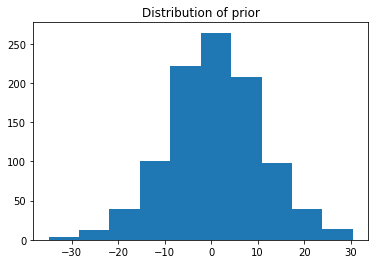

In [3]:
plt.hist(y_i);
plt.title('Distribution of prior');

4M2. Translate the model just above into a quap formula.

Ans: This is Rethinking package specific

4M3. Translate the quap model formula below into a mathematical model definition.
    
y ~ dnorm( mu , sigma ),

mu <- a + b*x,

a ~ dnorm( 0 , 10 ),

b ~ dunif( 0 , 1 ),

sigma ~ dexp( 1 )

Ans: 

$$ y \text{~} N(\mu,\sigma)$$

$$ \mu = \alpha + \beta x_i$$

$$ \alpha \text{~} N (0,10) $$

$$ \beta \text{~} Unif(0,1) $$

$$ \sigma \text{~} Expo(1) $$

4M4. A sample of students is measured for height each year for 3 years.After the third year,you want to fit a linear regression predicting height using year as a predictor. Write down the mathematical model definition for this regression, using any variable names and priors you choose. Be prepared to defend your choice of priors.

Assuming height is measured in cm

We want: $ H = f(y)$ where $H$ is height and $y$ is year

$$ H_i \text{~} N(\mu_i, \sigma)$$

$$ \mu_i = \alpha + \beta H_i$$

For the intercept, we assume height centered around 100 with variance of 100
$$ \alpha \text{~} N(100,10) $$

We don't expect the height to decrease with age, so we'll make it positive
$$ \beta \text{~} LogNorm(0,10) $$

We assume knowing average deviation 
$$ \sigma \text{~} Expo(1) $$


4M5. Now suppose I remind you that every student got taller each year. Does this information lead you to change your choice of priors? How?

Ans: I have already taken that into account when proposing a LogNormal Prior for $\beta$

4M6. Now suppose I tell you that the variance among heights for students of the same age is never more than 64cm. How does this lead you to revise your priors?

Ans: This will lead to revising the $\sigma$ prior to be $Unif(0,64)$

4M7. Refit model m4.3 from the chapter, but omit the mean weight xbar this time. Compare the new model’s posterior to that of the original model. In particular, look at the covariance among the parameters. What is different? Then compare the posterior predictions of both models.

Ans: Model m4.3 from the book

$$ h_i \text{~} N(\mu_i, \sigma)$$
$$ \mu_i = \alpha + \beta (x_i - \bar{x})$$

$$ \alpha \text{~} N(178,20)$$
$$ \beta \text{~} LogNorm(0,1)$$
$$ \sigma \text{~} U(0,50)$$

In [4]:
howell1 = '/Users/amralaa/CS - AGI core/[Prereq] Statistical Rethinking/resources/Rethinking_2/Data/Howell1.csv'

In [5]:
df = pd.read_csv(howell1,delimiter = ';')
d2 = df[df['age']>= 18]

In [6]:
d2.shape

(352, 4)

In [7]:
d2.columns

Index(['height', 'weight', 'age', 'male'], dtype='object')

In [8]:
d2.weight.std()

6.456708107277597

In [9]:
# d2['weight_sd'] = (d2.weight - d2.weight.mean())/d2.weight.std()

In [10]:
#In code

with pm.Model() as m431:
    alpha = pm.Normal('alpha', mu = 178, sd = 20)
    beta = pm.Lognormal('beta', mu = 0, sd = 1)
    sigma = pm.Uniform('sigma', lower = 0, upper = 50)

    mu = pm.Deterministic('mu', alpha + beta * (d2.weight - d2.weight.mean()))
    h = pm.Normal('h', mu = mu, sd = sigma, observed = d2.height)
    trace_m431 = pm.sample(1000, tune = 1000)

/var/folders/9p/5ycxgmps44zc3f0y6vljhp2h0000gn/T/ipykernel_35293/1607175169.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_m431 = pm.sample(1000, tune = 1000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta, alpha]


/Users/amralaa/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/amralaa/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/amralaa/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/amralaa/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 15 seconds.


In [11]:
# the model without x_bar

with pm.Model() as m432:
    alpha = pm.Normal('alpha', mu = 178, sd = 20)
    beta = pm.Lognormal('beta', mu = 0, sd = 1)
    sigma = pm.Uniform('sigma', lower = 0, upper = 50)
    
    mu = pm.Deterministic('mu', alpha + beta * d2.weight)
    h = pm.Normal('h', mu = mu, sd = sigma, observed = d2.height)
    trace_m432 = pm.sample(1000, tune = 1000)

/var/folders/9p/5ycxgmps44zc3f0y6vljhp2h0000gn/T/ipykernel_35293/2168059735.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_m432 = pm.sample(1000, tune = 1000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta, alpha]


/Users/amralaa/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/amralaa/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/amralaa/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/amralaa/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 16 seconds.
The acceptance probability does not match the target. It is 0.9045423477002139, but shou

In [12]:
#let's plot posterior distributions of both

varnames = ["~mu"]

/Users/amralaa/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


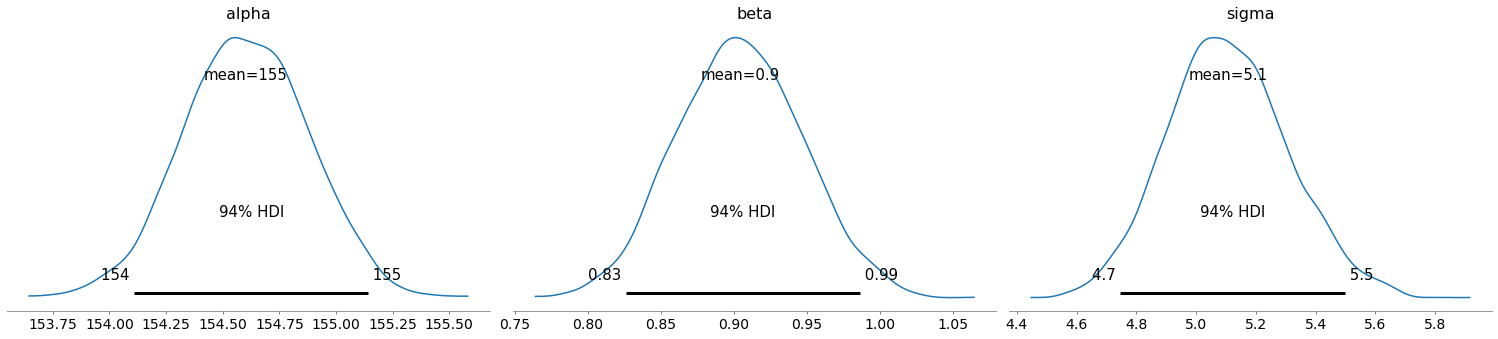

In [13]:
az.plot_posterior(trace_m431, var_names = varnames);

/Users/amralaa/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


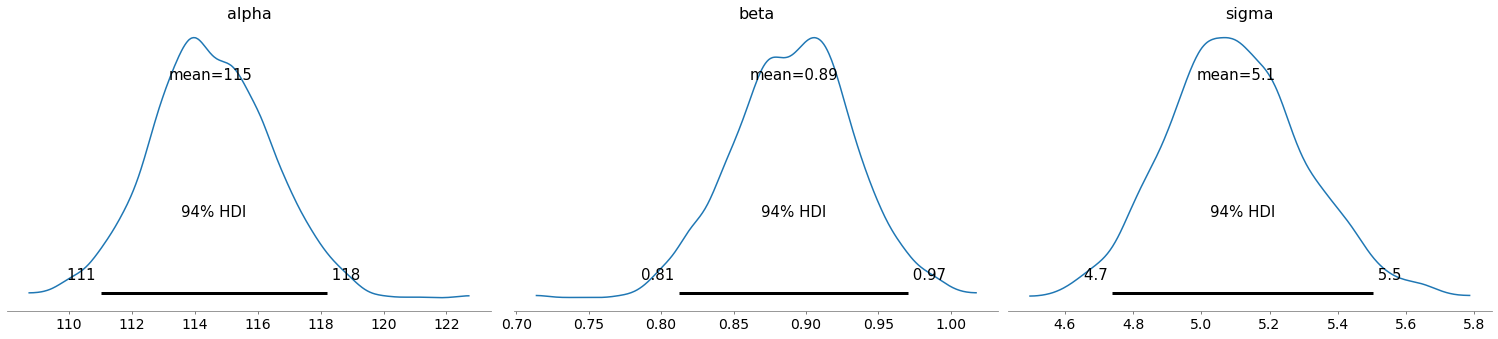

In [14]:
az.plot_posterior(trace_m432, var_names = varnames);

The first obvious difference is $\alpha$ as expected. Whereas the model with $\bar{x}$ centers it around 155 (expected height with average weight), the model without it doesn't.

Also, the 94% HDI of the $\alpha$ parameter is wider in the model without $\bar{x}$ (111 - 118) vs (154-155)

In [15]:
d2[['height','weight']].describe()

,height,weight
count,352.000000,352.000000
mean,154.597093,44.990486
std,7.742332,6.456708
min,136.525000,31.071052
25%,148.590000,40.256290
50%,154.305000,44.792210
75%,160.655000,49.292693
max,179.070000,62.992589


In [16]:
# let's look at covariance among parameters

m431_params = pm.trace_to_dataframe(trace_m431, varnames = ['alpha', 'beta', 'sigma'])
m432_params = pm.trace_to_dataframe(trace_m432, varnames = ['alpha', 'beta', 'sigma'])

In [17]:
m431_params.cov().round(3)

,alpha,beta,sigma
alpha,0.077,-0.000,-0.001
beta,-0.000,0.002,0.000
sigma,-0.001,0.000,0.040


In [18]:
m432_params.cov().round(3)

,alpha,beta,sigma
alpha,3.677,-0.080,0.006
beta,-0.080,0.002,-0.000
sigma,0.006,-0.000,0.042


What we can see in the covariance matrices:

The variance of $\alpha$ is higher in the model without $\bar{x}$ than the model with. That makes sense since $\alpha$ no longer represents the average height when weight is average.

If our models are: 

$ \mu = \alpha + \beta (x - \bar{x})$

$ \mu = \alpha' + \beta x$

Then we know that:

$\alpha = \mu$ when $x = \bar{x}$

While

$ \alpha' = \mu$ when $ x = 0$


So:

Uncertainty in $\alpha$ will be uncertainty of $\mu$'s center

Uncertainty in $\alpha'$ will be uncertainty of $\mu$ at the edge (0)

In [19]:
# plot posterior predective

pph_m431 = pm.sample_posterior_predictive(trace_m431, 200, m431)
pph_m432 = pm.sample_posterior_predictive(trace_m432,200, m432)

/Users/amralaa/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/pymc3/sampling.py:1689: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


/Users/amralaa/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/pymc3/sampling.py:1689: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


In [115]:
# let's plot using synthetic data
syn_weight = np.arange(0,70)

In [116]:
#simulate the mu from both using the simulated weights
m431_synth = []
m432_synth = []
mu_pred_431 = []
mu_pred_432 = []

for _ in range(1000):
    #generate random samples from the distribtuions
    i = np.random.randint(len(trace_m431))
    
    mu_431 = trace_m431['alpha'][i] + trace_m431['beta'][i] * (syn_weight - d2.weight.mean())
    mu_432 = trace_m432['alpha'][i] + trace_m432['beta'][i] * syn_weight
    
    sigma_431 = trace_m431['sigma'][i]
    sigma_432 = trace_m432['sigma'][i]
    
    post_samples_m431 = m431_synth.append(np.random.normal(mu_431,sigma_431))
    mu_pred_431.append(mu_431)
    post_samples_m432 = m432_synth.append(np.random.normal(mu_432,sigma_432))
    mu_pred_432.append(mu_432)

In [117]:
m431_synth = np.array(m431_synth)
m432_synth = np.array(m432_synth)
mu_pred_431 = np.array(mu_pred_431)
mu_pred_432 = np.array(mu_pred_432)

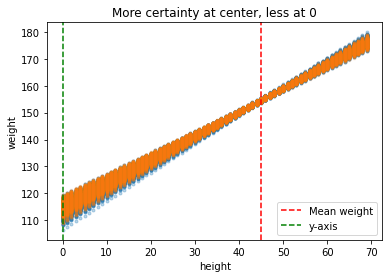

In [138]:
plt.plot(syn_weight,mu_pred_431.T,'C0.',alpha = 0.3);
plt.plot(syn_weight,mu_pred_432.T,'C1.',alpha = 0.1);
plt.axvline(np.mean(d2.weight), ls="--", c="r", label="Mean weight");
plt.axvline(0, ls="--", c="g", label="y-axis");
plt.xlabel('height');
plt.ylabel('weight');
plt.title('More certainty at center, less at 0')
plt.legend();

In [145]:
trace_m431['mu'].shape

(4000, 352)

Let's plot both posterior predictives

/Users/amralaa/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/arviz/stats/stats.py:456: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(
/Users/amralaa/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/arviz/stats/stats.py:456: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(


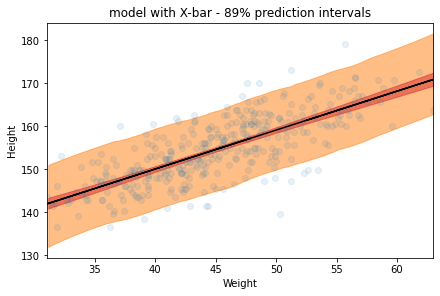

In [164]:
ax = az.plot_hdi(d2.weight, pph_m431['h']);
az.plot_hdi(d2.weight, trace_m431['mu'], ax = ax, color = 'C3');
plt.scatter(d2.weight,d2.height,alpha = 0.1);
plt.plot(d2.weight, trace_m431['mu'].mean(0),'k');
plt.xlabel("Weight")
plt.ylabel("Height")
plt.xlim(d2.weight.min(), d2.weight.max());
plt.title("model with X-bar - 89% prediction intervals");

/Users/amralaa/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/arviz/stats/stats.py:456: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(
/Users/amralaa/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/arviz/stats/stats.py:456: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(


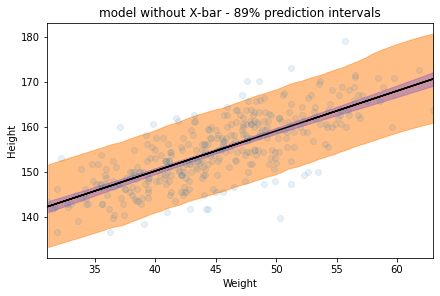

In [165]:
ax = az.plot_hdi(d2.weight, pph_m432['h']);
az.plot_hdi(d2.weight, trace_m432['mu'], ax = ax, color = 'C4');
plt.scatter(d2.weight,d2.height,alpha = 0.1);
plt.plot(d2.weight, trace_m432['mu'].mean(0),'k');
plt.xlabel("Weight")
plt.ylabel("Height")
plt.xlim(d2.weight.min(), d2.weight.max());
plt.title("model without X-bar - 89% prediction intervals");

Posterior predictions are nearly identical.

4M8. In the chapter,we used 15 knots with the cherryb lossom spline.Increase the number of knots and observe what happens to the resulting spline. Then adjust also the width of the prior on the weights—change the standard deviation of the prior and watch what happens. What do you think the combination of knot number and the prior on the weights controls?